## PLAN JE NAREDITI OMREŽJE POVEZAV MED IGRALCI IN V KATERIH FILMIH SO IGRALI SKUPAJ

## TODO

***Razmisliti ali naredim actor-actor ali movie-actor***

-actor-actor = vsak node (actor) povezan z drugim katera sta nastopala v vsaj enem filmu skupaj

-movie-actor = dve različni node groups, main so filmi in ostali actors, actor je povezan z filmi v katerih je igral  <- BOLJŠE

## CILJI

-najti igralce ki so bli največkrat skupaj v istih filmi


In [241]:
import numpy as np
import pandas as pd 
import networkx as nx
import plotly as py
import plotly.graph_objects as go
from numpy import random as nprand
import copy

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator

netflix = pd.read_csv("Netflix_all.csv")

subsetMostRatedMovies = netflix[[movie['cast'] != '0' and len(movie['cast'].split(", ")) > 1  for index, movie in netflix.iterrows()]] #Filtrira filme z vsaj 2 ali več igralcev
subsetMostRatedMovies.sort_values(by=['averageRating'], inplace=True, ascending=False)
subset500MostRatedMovies = subsetMostRatedMovies[['type', 'title', 'cast', 'averageRating', 'numVotes']].head(500) #500 najbolj ocenjenih filmov
subset500MostRatedMovies = subset500MostRatedMovies[subset500MostRatedMovies['numVotes'] >= 3000]

In [242]:
topOcenjeniIgralciOcene = dict()
topOcenjeniIgralciStFilmov = dict()

for index, row in netflix.iterrows():
    if(row['type'] == 'Movie'):
        cast = row['cast'].split(", ")
        if(len(cast) >= 2):
            for actor in cast:
                if(actor not in topOcenjeniIgralciStFilmov):
                    #topOcenjeniIgralciOcene[actor] = 0
                    topOcenjeniIgralciStFilmov[actor] = 0
                else:
                    #topOcenjeniIgralciOcene[actor] += int(row['averageRating'])
                    topOcenjeniIgralciStFilmov[actor] += 1
           
'''
for a in topOcenjeniIgralciStFilmov:
    if(topOcenjeniIgralciStFilmov[a] > 2):
        b = topOcenjeniIgralciOcene[a]/topOcenjeniIgralciStFilmov[a]
        if(b >= 6.5):
            topOcenjeniIgralciOcene[a] = b
        else:
            del topOcenjeniIgralciOcene[a]
    else:
        del topOcenjeniIgralciOcene[a]

topOcenjeniIgralciOcene = {k: v for k, v in sorted(topOcenjeniIgralciOcene.items(), key=lambda item: item[1])}

top = dict()

for k in reversed(list(topOcenjeniIgralciOcene.keys())):
    top[k] = topOcenjeniIgralciOcene[k]
'''

'\nfor a in topOcenjeniIgralciStFilmov:\n    if(topOcenjeniIgralciStFilmov[a] > 2):\n        b = topOcenjeniIgralciOcene[a]/topOcenjeniIgralciStFilmov[a]\n        if(b >= 6.5):\n            topOcenjeniIgralciOcene[a] = b\n        else:\n            del topOcenjeniIgralciOcene[a]\n    else:\n        del topOcenjeniIgralciOcene[a]\n\ntopOcenjeniIgralciOcene = {k: v for k, v in sorted(topOcenjeniIgralciOcene.items(), key=lambda item: item[1])}\n\ntop = dict()\n\nfor k in reversed(list(topOcenjeniIgralciOcene.keys())):\n    top[k] = topOcenjeniIgralciOcene[k]\n'

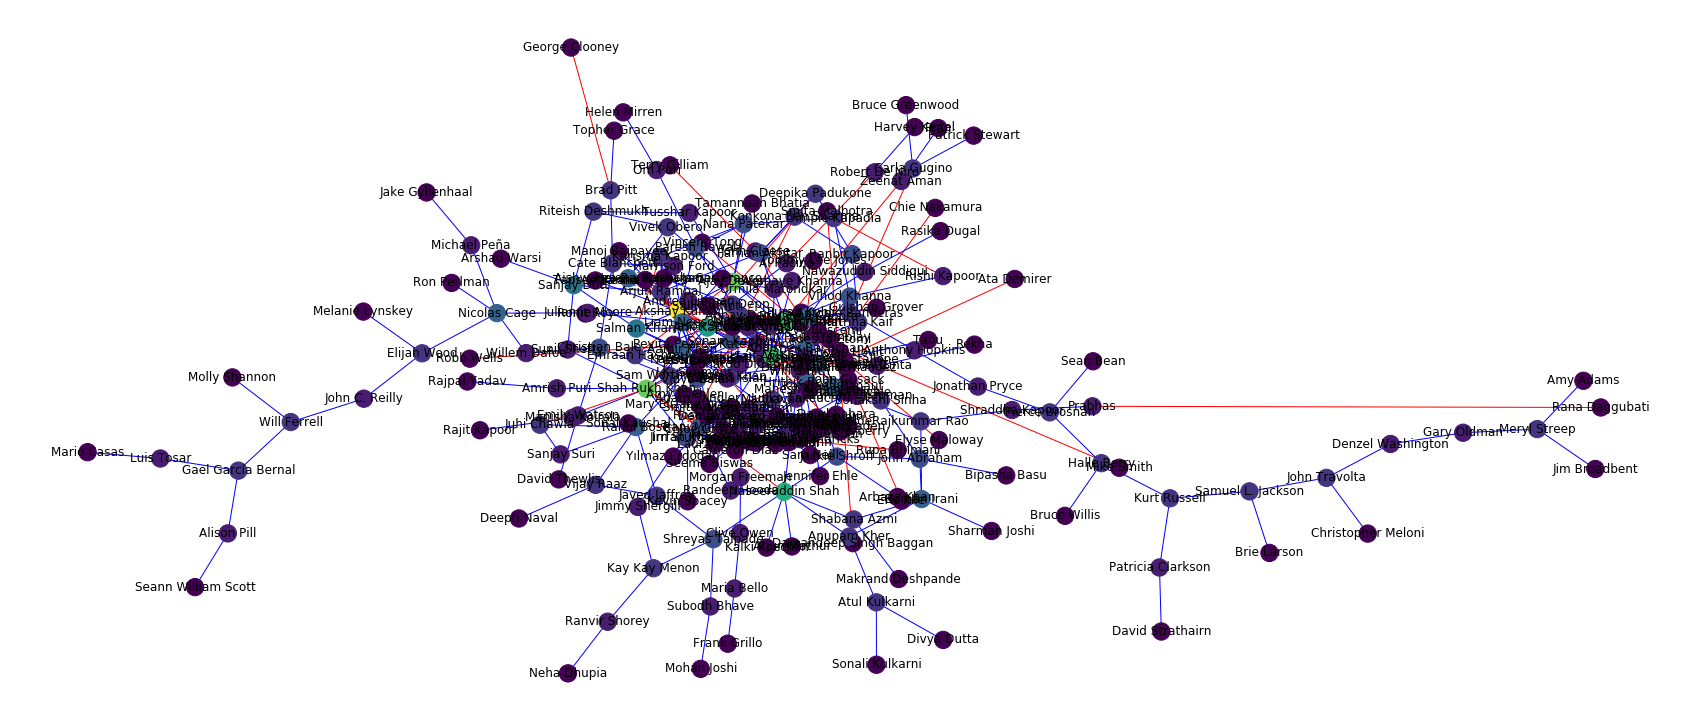

In [243]:
GtopActors = nx.Graph()

for index, row in netflix.iterrows():
    if(row['type'] == 'Movie'):
        cast = row['cast'].split(', ')
        if(len(cast) >= 2):
            if(topOcenjeniIgralciStFilmov[cast[0]] > 4 and topOcenjeniIgralciStFilmov[cast[1]] > 4):
                #print(G[cast[actor]][cast[actor2]]['weight'])
                if(GtopActors.has_edge(cast[0], cast[1])):
                    wi = GtopActors[cast[0]][cast[1]]['weight']
                    GtopActors[cast[0]][cast[1]]['weight'] = wi + 1                        
                else:
                    GtopActors.add_edge(cast[0], cast[1], weight=1)

plt.figure(figsize=(30, 13))
pos = nx.kamada_kawai_layout(GtopActors)
node_color = [20000.0 * GtopActors.degree(v) for v in GtopActors]
edge_color = ['blue' if GtopActors.get_edge_data(*v)['weight']<2 else 'red' for v in GtopActors.edges()]

nx.draw_networkx(GtopActors, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color) #For this case choose either draw_spring or draw_kamada_kawai

plt.show()


In [244]:
G = nx.Graph()
nodes = []

for index, row in subset500MostRatedMovies.iterrows():
    if(row['cast'] != '0'):
        cast = row['cast'].split(', ')
        nodes.extend(cast)
        for actor in range(0, len(cast)-1):
            for actor2 in range(actor, len(cast)-1):
                if(cast[actor] != cast[actor2]):
                    #print(G[cast[actor]][cast[actor2]]['weight'])
                    if(G.has_edge(cast[actor], cast[actor2])):
                        wi = G[cast[actor]][cast[actor2]]['weight']
                        G[cast[actor]][cast[actor2]]['weight'] = wi + 1                        
                    else:
                        G.add_edge(cast[actor], cast[actor2], weight=1)

#G.add_nodes_from(set(nodes))

degrees = dict(G.degree())
fff = copy.deepcopy(G.nodes())

for node in fff:
    if (G.degree(node) <= 30):
        G.remove_node(node)




GGEn=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > 2]
GGSm=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= 1]

#G.remove_nodes_from([ime for ime in G.edges() if G[ime[0]][ime[1]]['weight'] < 10])

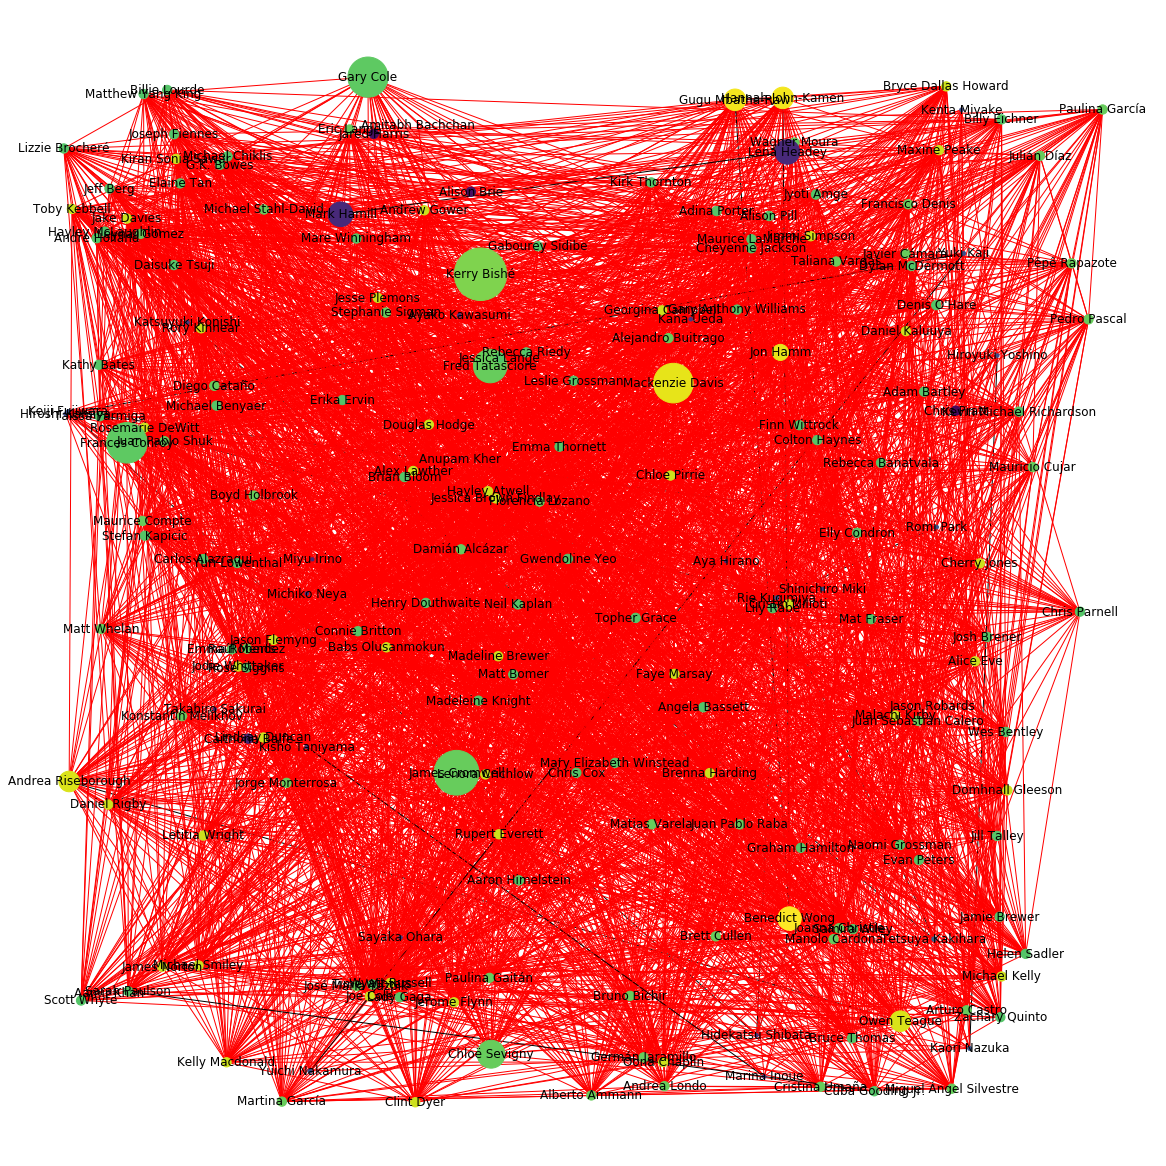

In [245]:
plt.figure(figsize=(16, 16))
pos = nx.random_layout(G)
node_color = [20000.0 * G.degree(v) for v in G]

edge_color = ['red' if G.get_edge_data(*v)['weight']<2 else 'black' for v in G.edges()]

betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betCent.values()]

nx.draw_random(G, edge_color=edge_color, with_labels=True, node_color=node_color, node_size=node_size)

#nx.draw_networkx_nodes(G,pos, node_size=120, with_labels=True)
#nx.draw_networkx_edges(G,pos,edgelist=GGEn, width=7, edge_color='red')
#nx.draw_networkx_edges(G,pos,edgelist=GGSm, width=0.5,alpha=0.5,edge_color='black',style='dashed')
plt.show()

In [246]:
print(G.get_edge_data(*('Romi Park', 'Rie Kugimiya'))['weight'])

2
